# <h3><b>Import Libraries

In [7]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimport!")

Library berhasil diimport!


# <h3><b>Load Data

In [8]:
print("Membaca data dari datatrain.xlsx...")
try:
    df = pd.read_excel('datatrain.xlsx')
    print(f"Data berhasil dibaca! Shape: {df.shape}")
    print("\nInfo dataset:")
    print(df.info())
    print("\nSample data:")
    print(df.head())
except FileNotFoundError:
    print("File datatrain.xlsx tidak ditemukan. Pastikan file berada di direktori yang sama.")
except Exception as e:
    print(f"Error membaca file: {e}")


Membaca data dari datatrain.xlsx...
Data berhasil dibaca! Shape: (385, 3)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     373 non-null    object
 1   text    367 non-null    object
 2   label   369 non-null    object
dtypes: object(3)
memory usage: 9.1+ KB
None

Sample data:
                    url                                               text  \
0   https://pornhub.com  Free Porn Videos & Sex Movies - Porno, XXX, Po...   
1   https://xvideos.com  Free Porn Videos - XVIDEOS.COM WARNING This si...   
2  https://xhamster.com  Free Porn Videos & Sex Tube Movies at xHamster...   
3   https://redtube.com  Free Porn Sex Videos - Redtube - XXX Movies - ...   
4      https://xnxx.com  Free Porn, Sex, Tube Videos, XXX Pics, Pussy i...   

       label  
0  berbahaya  
1  berbahaya  
2  berbahaya  
3  berbahaya  
4  berbahaya  


# <h3><b>Simple EDA


=== EKSPLORASI DATA ===
Jumlah data: 385
Kolom yang tersedia: ['url', 'text', 'label']

Distribusi label:
label
aman         188
berbahaya    181
Name: count, dtype: int64

Persentase label:
label
aman         50.948509
berbahaya    49.051491
Name: proportion, dtype: float64

Missing values:
url      12
text     18
label    16
dtype: int64


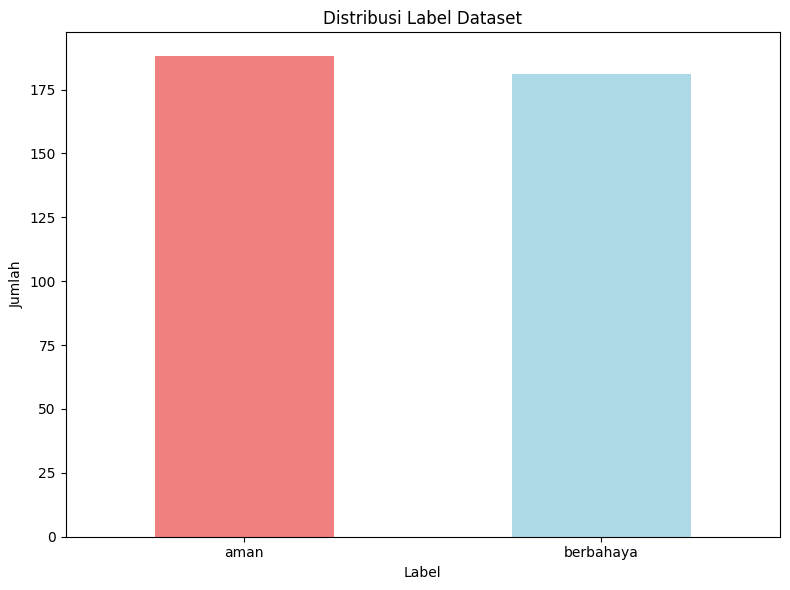

In [9]:
# Eksplorasi data
print("\n=== EKSPLORASI DATA ===")
print(f"Jumlah data: {len(df)}")
print(f"Kolom yang tersedia: {df.columns.tolist()}")
print("\nDistribusi label:")
print(df['label'].value_counts())
print("\nPersentase label:")
print(df['label'].value_counts(normalize=True) * 100)

# Cek missing values
print("\nMissing values:")
print(df.isnull().sum())

# Visualisasi distribusi label
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribusi Label Dataset')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# <h3><b>Prepos

In [10]:
# Preprocessing text
def preprocess_text(text):
    """
    Fungsi untuk preprocessing teks
    """
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove special characters and numbers (opsional)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())
    
    return text

print("\n=== PREPROCESSING DATA ===")
# Apply preprocessing
df['text_processed'] = df['text'].apply(preprocess_text)

# Remove rows with empty text
df = df[df['text_processed'].str.len() > 0]
print(f"Jumlah data setelah preprocessing: {len(df)}")

# Prepare features and target
X = df['text_processed']
y = df['label']

print(f"Jumlah sampel: {len(X)}")
print(f"Distribusi label setelah preprocessing:")
print(y.value_counts())


=== PREPROCESSING DATA ===
Jumlah data setelah preprocessing: 366
Jumlah sampel: 366
Distribusi label setelah preprocessing:
label
aman         183
berbahaya    175
Name: count, dtype: int64


# <h3><b> Split Data

In [11]:
print("\n=== SPLIT DATA ===")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print(f"Data training: {len(X_train)} sampel")
print(f"Data testing: {len(X_test)} sampel")
print(f"Distribusi label training: {y_train.value_counts().to_dict()}")
print(f"Distribusi label testing: {y_test.value_counts().to_dict()}")

# Feature extraction menggunakan TF-IDF
print("\n=== FEATURE EXTRACTION ===")
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,  # Maksimal 5000 fitur
    min_df=2,          # Minimal muncul di 2 dokumen
    max_df=0.8,        # Maksimal muncul di 80% dokumen
    stop_words='english',  # Hapus stop words bahasa Inggris
    ngram_range=(1, 2)     # Unigram dan bigram
)

# Fit dan transform data training
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape X_test_tfidf: {X_test_tfidf.shape}")
print(f"Jumlah fitur TF-IDF: {len(tfidf.get_feature_names_out())}")


=== SPLIT DATA ===


ValueError: Input contains NaN

# <h3><b>Training Model

In [ ]:
# Training SVM Model
print("\n=== TRAINING SVM MODEL ===")
# Inisialisasi SVM classifier
svm_model = SVC(
    kernel='linear',    # Kernel linear untuk text classification
    C=1.0,             # Regularization parameter
    random_state=42,
    probability=True   # Untuk mendapatkan probabilitas prediksi
)

# Training model
print("Memulai training...")
svm_model.fit(X_train_tfidf, y_train)
print("Training selesai!")

# <h3><b>Evaluasi Model

In [ ]:
# Prediksi pada data test
print("\n=== EVALUASI MODEL ===")
y_pred = svm_model.predict(X_test_tfidf)
y_pred_proba = svm_model.predict_proba(X_test_tfidf)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm_model.classes_, 
            yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Analisis fitur penting
print("\n=== ANALISIS FITUR PENTING ===")
# Mendapatkan koefisien fitur
feature_names = tfidf.get_feature_names_out()
coefficients = svm_model.coef_[0]

# Membuat DataFrame untuk analisis
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
}).sort_values('coefficient', key=abs, ascending=False)

print("Top 10 fitur paling penting (positif - berbahaya):")
print(feature_importance.head(10))

print("\nTop 10 fitur paling penting (negatif - aman):")
print(feature_importance.tail(10))

# Visualisasi top fitur
plt.figure(figsize=(12, 8))
top_features = pd.concat([feature_importance.head(10), feature_importance.tail(10)])
colors = ['red' if x > 0 else 'blue' for x in top_features['coefficient']]
plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Koefisien SVM')
plt.title('Top 20 Fitur Paling Penting')
plt.tight_layout()
plt.show()

# <h3><b>Prediksi Data Baru

In [ ]:
# Fungsi untuk prediksi teks baru
def predict_text(text, model=svm_model, vectorizer=tfidf):
    """
    Fungsi untuk memprediksi teks baru
    """
    # Preprocessing
    processed_text = preprocess_text(text)
    
    # Vectorization
    text_tfidf = vectorizer.transform([processed_text])
    
    # Prediksi
    prediction = model.predict(text_tfidf)[0]
    probability = model.predict_proba(text_tfidf)[0]
    
    # Confidence score
    confidence = max(probability)
    
    return {
        'prediction': prediction,
        'confidence': confidence,
        'probabilities': dict(zip(model.classes_, probability))
    }

# Test prediksi dengan contoh
print("\n=== TEST PREDIKSI ===")
test_texts = [
    "Click here to win free money now!",
    "This is a normal website about technology",
    "Download malware and virus for free",
    "Learn Python programming tutorial"
]

for text in test_texts:
    result = predict_text(text)
    print(f"\nTeks: '{text}'")
    print(f"Prediksi: {result['prediction']}")
    print(f"Confidence: {result['confidence']:.4f}")
    print(f"Probabilitas: {result['probabilities']}")

# Simpan model (opsional)
print("\n=== SIMPAN MODEL ===")
import joblib

# Simpan model dan vectorizer
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("Model dan vectorizer berhasil disimpan!")

# Instruksi untuk load model
print("\n=== CARA LOAD MODEL ===")
print("Untuk load model yang sudah disimpan:")
print("loaded_model = joblib.load('svm_model.pkl')")
print("loaded_tfidf = joblib.load('tfidf_vectorizer.pkl')")

print("\n=== TRAINING SELESAI ===")
print(f"Model SVM berhasil ditraining dengan akurasi: {accuracy:.4f}")
print("Model siap digunakan untuk klasifikasi teks!")